# Investment

This script allows to quickly determine for a given head H and volume flow rate Q, how much yearly intake can be expected and if the net present value would be positive.

## Imports and constants

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

g = 9.81 # Gravitational acceleration 9.81 m.s-2
PI = math.pi # PI
rho = 999 # Density of water at 15 deg Celsius in kg.m-3
C_W_to_kW = 1000 # Conversion factor in W.kW-1

## Yearly Intake

### Assumptions

Calculating the expected yearly intake *YI* and nominal electric power *P_el* from hydraulic and boundary parameters:

- Head *H* in m
- Volumetric flow rate *Q* in m3.s-1
- Hydraulic efficiency of the turbine *eta_t* in dimensionless
- electricity price *EP* in €.kWh-1
- Annual full load hours *FLH* in h/a

In [11]:
# Please enter your hydraulic characteristics here:

H     = 2.0 # in m
Q     = 5.0 # in m3.s-1
eta_t = 0.8 # in dimensionless

EP    = 0.15 # in €.kWh-1
FLH   = 5000 # in h/a

P_el = rho * g * H * Q * eta_t / C_W_to_kW 
YI = P_el * EP * FLH 

print( "The expected nominal power is: " , P_el , "kW" )
print( "The expected yearly intake is: " , YI , "€" )

The expected nominal power is:  78.40152 kW
The expected yearly intake is:  58801.14 €


## Overview on expected yearly intake for different Head H and volume flow rate Q

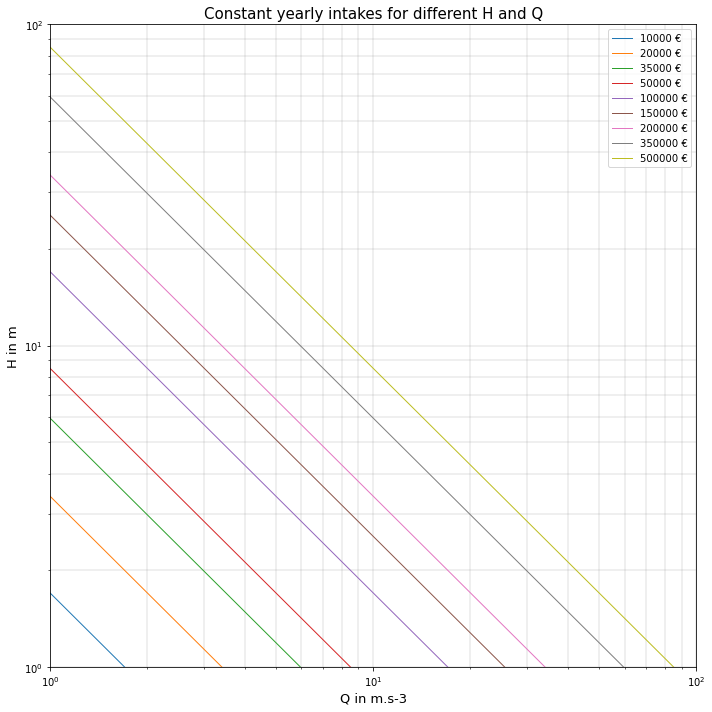

In [9]:
# Calculate constant yearly intakes
# Preparing the data for the plot
YI_span = [ 10000 ,
       20000 ,
       35000 ,
       50000 ,
       100000 ,
       150000 ,
       200000 ,
       350000 ,
       500000 ]

ALL_Q = np.arange( 0.001 , 100.0 , 0.1 )

ALL_H = [ ]
for yi in YI_span:
    H = []
    for q in ALL_Q:
        H.append( yi / rho / g / eta_t * C_W_to_kW / EP / FLH / q )
    ALL_H.append( ( yi , H ) )


# Creating figure and axes
fig, ( ax2 ) = plt.subplots( 1 , 1, figsize=[10, 10])

# Plotting the graph with Log ticks at x and y axis using loglog
for tpl in ALL_H:
    ax2.loglog( ALL_Q , tpl[ 1 ] , '-' , linewidth = 1 , label = str( tpl[ 0 ] ) + ' €')
ax2.set_title( 'Constant yearly intakes for different H and Q' , fontsize = 15 )

#ax2.loglog( Q , H , '-' , linewidth = 10 , label = 'Your site')

plt.grid( visible = True , which = 'both' , color = 'grey', ls = '-' , lw = 0.25 )

ax2.set_xlabel( 'Q in m.s-3' , fontsize = 13 )
ax2.set_ylabel( 'H in m' , fontsize = 13 )

ax2.set_xlim( 1 , 100 )
ax2.set_ylim( 1 , 100 )

ax2.legend()

plt.tight_layout()
plt.show()

## Calculate Net Present Value of the invest

Calculate the net present value (*NPV*)

- The relative capital expenditure (CAPEX) cost *CAPEX* in €.kW-1
- The yearly intake *YI* in €
- Interest rate *r* dimensionless     

In [17]:
# Definition of inputs

# Use constant values below if applicable 
#I = 100000 # Total invest at time t = 0 in €
#YI = 50000 # Yearly intake in €/a

CAPEX = 4000

I = P_el * CAPEX # Total capital expenditure

r = 0.05 # Interest rate in percent
T = 20 # Number of years to be considered
OAM = 0.05 # Maintenance cost in percent of the total invest

# Initialise variables
cashflows = [ YI - I * OAM ] * T
sum = 0
t = 0

# Calculating the sum of cashflows
for cf in cashflows:
    t = t + 1
    sum += float( cf ) / ( 1 + r ) ** t

NPV = sum - I

print( "The initial capital expenditure is: " , I , "€" )
print( "The yearly constant cashflow is: " , cashflows[ 0 ] , " = " , YI , " - " , I , " * " , OAM )
print( "The NPV is: " , NPV )

if NPV >= 0:
    print( "NPV is positive, your invest is likely to be lucrative" )
if NPV < 0:
    print( "NPV is negative, your invest is likely to fail" )

The initial capital expenditure is:  313606.08 €
The yearly constant cashflow is:  43120.835999999996  =  58801.14  -  313606.08  *  0.05
The NPV is:  223774.84837817034
NPV is positive, your invest is likely to be lucrative
